In [ ]:
#Import necessary libraries for data manipulation and visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
data = pd.read_csv('portfolio_data.csv')
print(data.head())  # Display the first few rows of the dataset

       Date        AMZN        DPZ         BTC       NFLX
0  5/1/2013  248.229996  51.190983  106.250000  30.415714
1  5/2/2013  252.550003  51.987320   98.099998  30.641428
2  5/3/2013  258.049988  52.446388  112.900002  30.492857
3  5/6/2013  255.720001  53.205257  109.599998  30.098572
4  5/7/2013  257.730011  54.151505  113.199997  29.464285


In [4]:
# Getting information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1520 non-null   object 
 1   AMZN    1520 non-null   float64
 2   DPZ     1520 non-null   float64
 3   BTC     1520 non-null   float64
 4   NFLX    1520 non-null   float64
dtypes: float64(4), object(1)
memory usage: 59.5+ KB


In [5]:
# Check for non-null values in each column
print(data.notnull().sum())

Date    1520
AMZN    1520
DPZ     1520
BTC     1520
NFLX    1520
dtype: int64


In [6]:
# Check for null values in each column
print(data.isnull().sum())

Date    0
AMZN    0
DPZ     0
BTC     0
NFLX    0
dtype: int64


In [7]:
# Convert the Date column to datetime format and set it as the index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Resample the data to daily frequency and compute the mean
resampled_data = data.resample('D').mean()
print(resampled_data)

                   AMZN         DPZ          BTC        NFLX
Date                                                        
2013-05-01   248.229996   51.190983   106.250000   30.415714
2013-05-02   252.550003   51.987320    98.099998   30.641428
2013-05-03   258.049988   52.446388   112.900002   30.492857
2013-05-04          NaN         NaN          NaN         NaN
2013-05-05          NaN         NaN          NaN         NaN
...                 ...         ...          ...         ...
2019-05-10  1889.979980  278.369995  7191.359863  361.040009
2019-05-11          NaN         NaN          NaN         NaN
2019-05-12          NaN         NaN          NaN         NaN
2019-05-13  1822.680054  273.880005  7980.129883  345.260010
2019-05-14  1840.119995  272.859985  8183.830078  345.609985

[2205 rows x 4 columns]


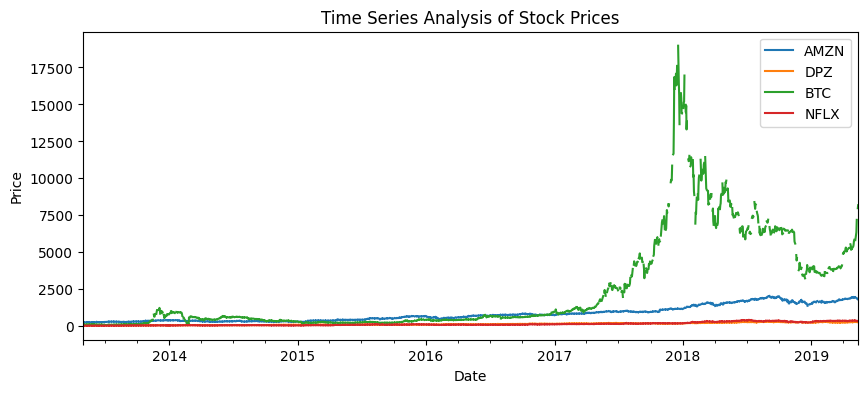

In [8]:
# Plot the resampled data
resampled_data.plot(figsize=(10, 4))
plt.title("Time Series Analysis of Stock Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(resampled_data.columns)
plt.show()

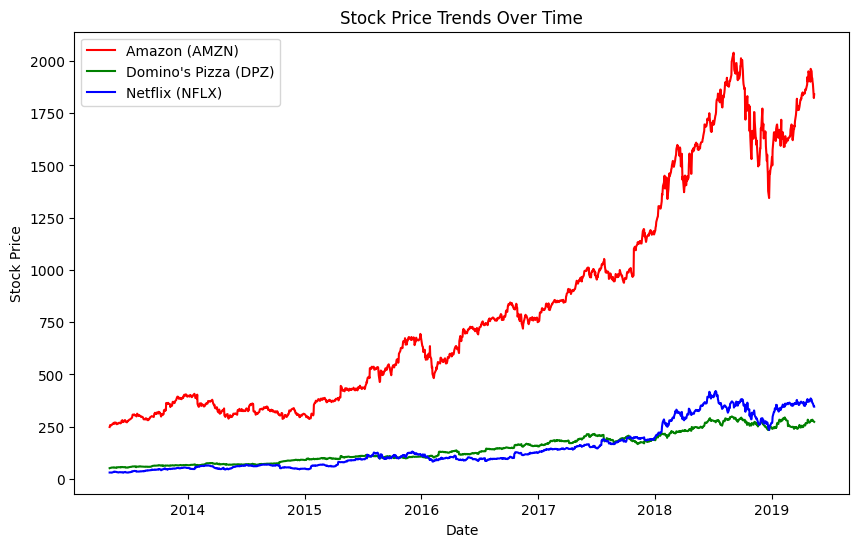

In [9]:
# Plot time series data for specific stocks using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x="Date", y="AMZN", label='Amazon (AMZN)', color='r')
sns.lineplot(data=data, x="Date", y="DPZ", label='Domino\'s Pizza (DPZ)', color='g')
sns.lineplot(data=data, x="Date", y="NFLX", label='Netflix (NFLX)', color='b')
plt.ylabel("Stock Price")
plt.title("Stock Price Trends Over Time")
plt.legend()
plt.show()

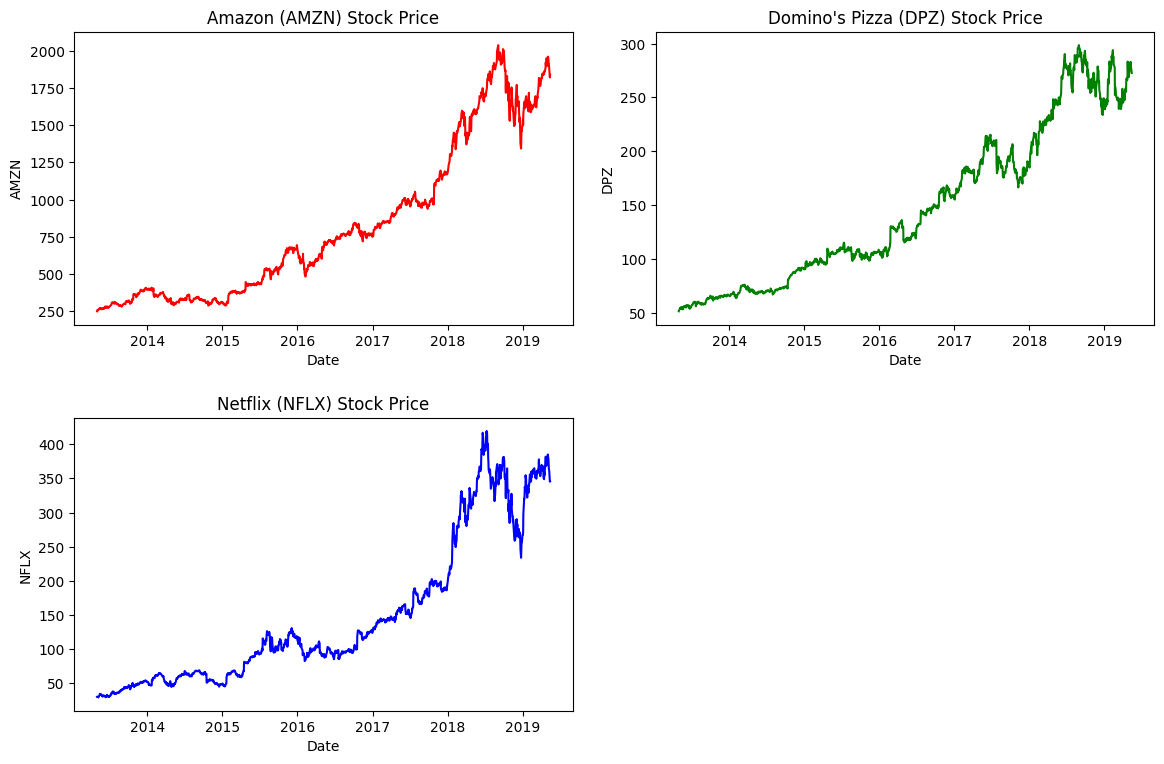

In [10]:
# Create subplots for the time series data
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

sns.lineplot(data=data, x="Date", y="AMZN", color='r', ax=axs[0, 0])
axs[0, 0].set_title('Amazon (AMZN) Stock Price')

sns.lineplot(data=data, x="Date", y="DPZ", color='g', ax=axs[0, 1])
axs[0, 1].set_title('Domino\'s Pizza (DPZ) Stock Price')

sns.lineplot(data=data, x="Date", y="NFLX", color='b', ax=axs[1, 0])
axs[1, 0].set_title('Netflix (NFLX) Stock Price')

fig.delaxes(axs[1, 1])  # Remove the empty subplot
fig.tight_layout(pad=2.0)
